In [23]:
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 
import numpy as np
import imgaug.augmenters as iaa
import cv2
import statistics
import pandas as pd
import math

In [24]:
dic = "high_resolution"

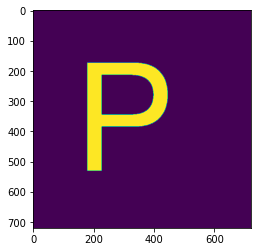

In [25]:
P = cv2.imread(dic + "/P.png",0)
_, P = cv2.threshold(P, 128, 255, cv2.THRESH_BINARY_INV)
plt.imshow(P) 

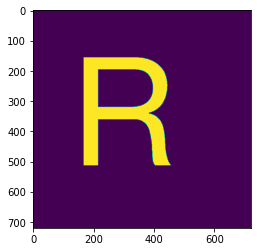

In [26]:
R = cv2.imread(dic + '/R.png',0)
_, R = cv2.threshold(R, 128, 255, cv2.THRESH_BINARY_INV)
plt.imshow(R)

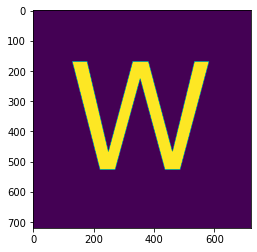

In [27]:
W = cv2.imread(dic + '/W.png',0)
_, W = cv2.threshold(W, 128, 255, cv2.THRESH_BINARY_INV)
plt.imshow(W)

In [120]:
seq = iaa.Sequential([
    iaa.Sometimes(
        0.5,
        iaa.GaussianBlur(sigma=(0, 0.5))
    ),
    iaa.Affine(
        scale={"x": (0.8, 1.2), "y": (0.8, 1.2)},
        translate_percent={"x": (-0.1, 0.1), "y": (-0.1, 0.1)},
        rotate=(-90, 90),
    )
], random_order=True)

scale = iaa.Affine(scale={"x": (0.75, 1.25), "y": (0.75, 1.25)})
translate = iaa.Affine(translate_percent={"x": (-0.15, 0.15), "y": (-0.15, 0.15)})
rotate = iaa.Affine(rotate=(-90, 90))

In [45]:
P_cs = [seq(images=np.array(P)) for _ in range(10)]
W_cs = [seq(images=np.array(W)) for _ in range(10)]
R_cs = [seq(images=np.array(R)) for _ in range(10)]

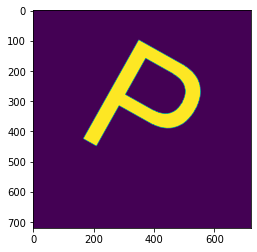

In [46]:
plt.imshow(P_cs[0])

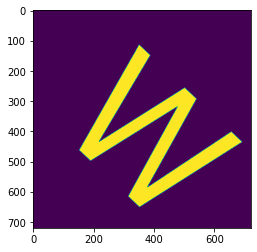

In [57]:
plt.imshow(W_cs[8])

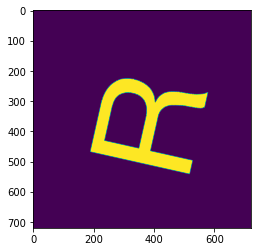

In [48]:
plt.imshow(R_cs[9])

In [49]:
def get_hu_moments(imgs, names, hu_nr):
    results = {}
    for i in range(len(imgs)):
        results[names[i]] = {}
        for j in range(len(imgs[i])):
            moments = cv2.moments(imgs[i][j])
            hu_moment = cv2.HuMoments(moments)[hu_nr][0]
            results[names[i]][j] = hu_moment
        #results[names[i]]["VAR"] = statistics.variance(results[names[i]].values())
    return results

In [50]:
results = [get_hu_moments([[P], [W], [R]], ['P', 'W', 'R'], hu_nr) for hu_nr in range(7)]
dfs = [pd.DataFrame(data=result) for result in results]

In [51]:
dfs[1]

,P,W,R
0,3.082806e-07,1.547200e-07,1.643151e-08


In [52]:
results = [get_hu_moments([P_cs, W_cs, R_cs], ['P','W','R'], hu_nr) for hu_nr in range(7)]
dfs = [pd.DataFrame(data=result) for result in results]

In [54]:
dfs[1]

,P,W,R
0,3.156341e-07,1.248961e-07,2.983995e-08
1,3.057698e-07,8.319542e-09,4.244292e-07
2,3.241789e-07,3.623164e-07,4.191844e-08
3,3.583113e-07,1.107675e-07,3.535376e-09
4,2.974204e-07,7.763810e-07,1.101212e-07
5,3.419469e-07,4.387282e-08,3.210853e-08
6,3.064367e-07,2.262983e-10,2.058261e-08
7,5.649594e-07,8.053914e-12,3.513608e-09
8,2.871833e-07,9.502919e-08,2.286169e-08
9,6.966794e-07,3.253214e-09,1.075536e-08


In [55]:
W_cs[7]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [101]:
def var_by_set(set):
    results = {}
    for i in range(len(set)):
        results[set[i]] = [(dfs[x][set[i]]["VAR"]/dfs[x][set[i]][0]) for x in range(len(dfs))]
    return results

In [102]:
pd.DataFrame(data=var_by_set(["P", "W", "R"]))

,P,W,R
0,1.186305e-06,1.530948e-06,1.384203e-06
1,3.680061e-08,4.638827e-07,1.491412e-06
2,5.177741e-12,4.059933e-12,1.924407e-11
3,1.993507e-11,1.323536e-12,1.242547e-12
4,2.505890e-20,-4.753211e-22,-1.245850e-23
5,3.812754e-14,-1.115295e-14,6.126173e-14
6,6.643894e-21,9.621513e-23,-4.159979e-22


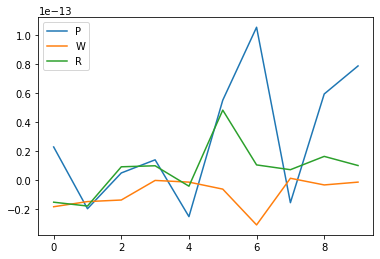

In [190]:
dfs[5].plot()

In [121]:
def get_hu_moments_single(imgs, names, hu_nr):
    results = {}
    for i in range(len(imgs)):
        results[names[i]] = {}
        moments = cv2.moments(imgs[i])
        hu_moment = cv2.HuMoments(moments)[hu_nr][0]
        results[names[i]] = hu_moment
        #results[names[i]]["VAR"] = statistics.variance(results[names[i]].values())
    return results

In [122]:
P_scaled = [scale(images=np.array(P)) for _ in range(10)]
R_scaled = [scale(images=np.array(R)) for _ in range(10)]
W_scaled = [scale(images=np.array(W)) for _ in range(10)]

In [146]:
results = [get_hu_moments_single([P, R, W],['P', 'R', 'W'], hu_nr) for hu_nr in range(7)]
dfs = pd.DataFrame(data=results)

In [147]:
dfs

,P,R,W
0,1.681555e-03,1.681385e-03,1.749477e-03
1,3.082806e-07,1.643151e-08,1.547200e-07
2,1.505765e-09,1.089115e-10,3.730075e-10
3,7.708828e-11,6.632397e-11,2.779396e-11
4,1.022751e-20,-4.560059e-21,-2.809952e-21
5,1.415954e-14,8.500159e-15,-1.088774e-14
6,2.419084e-20,-3.313733e-21,3.361502e-22


In [125]:
results = [get_hu_moments_single([P_scaled[0], R_scaled[0], W_scaled[0]], ['P','R','W'], hu_nr) for hu_nr in range(7)]
dfs = pd.DataFrame(data=results)

In [126]:
dfs

,P,R,W
0,1.680172e-03,1.839707e-03,1.720050e-03
1,3.025616e-07,5.763546e-07,5.244017e-08
2,1.489310e-09,3.111872e-11,2.854468e-10
3,5.252152e-11,9.326695e-11,1.310277e-11
4,-1.315610e-20,-4.741119e-21,-7.971589e-22
5,-2.657595e-14,6.953011e-14,2.993526e-15
6,6.533763e-21,-1.663887e-21,8.157837e-23


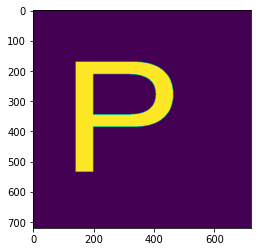

In [127]:
plt.imshow(P_scaled[0])

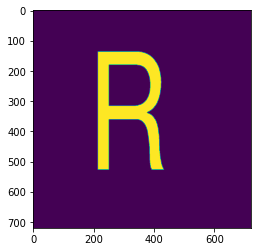

In [128]:
plt.imshow(R_scaled[0])

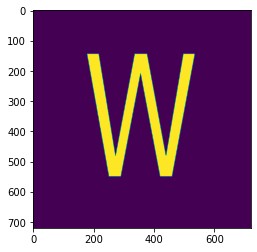

In [129]:
plt.imshow(W_scaled[0])

In [130]:
P_trans = [translate(images=np.array(P)) for _ in range(10)]
R_trans = [translate(images=np.array(R)) for _ in range(10)]
W_trans = [translate(images=np.array(W)) for _ in range(10)]

In [131]:
results = [get_hu_moments_single([P_trans[0], R_trans[0], W_trans[0]], ['P','R','W'], hu_nr) for hu_nr in range(7)]
dfs = pd.DataFrame(data=results)

In [132]:
dfs

,P,R,W
0,1.681593e-03,1.681409e-03,1.749493e-03
1,3.082872e-07,1.643031e-08,1.547089e-07
2,1.505780e-09,1.089111e-10,3.729974e-10
3,7.708931e-11,6.632265e-11,2.779231e-11
4,1.022813e-20,-4.560047e-21,-2.809668e-21
5,1.415966e-14,8.499686e-15,-1.088671e-14
6,2.419129e-20,-3.313448e-21,3.360776e-22


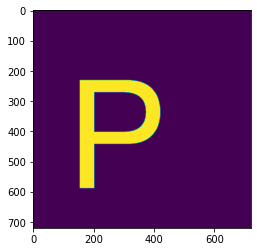

In [133]:
plt.imshow(P_trans[0])

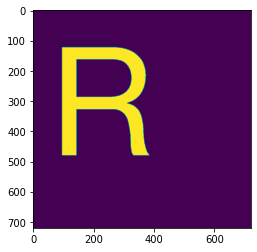

In [134]:
plt.imshow(R_trans[0])

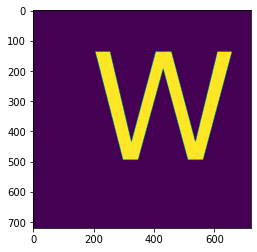

In [135]:
plt.imshow(W_trans[0])

In [140]:
P_rotate = [rotate(images=np.array(P)) for _ in range(10)]
R_rotate = [rotate(images=np.array(R)) for _ in range(10)]
W_rotate = [rotate(images=np.array(W)) for _ in range(10)]

In [141]:
results = [get_hu_moments_single([P_rotate[0], R_rotate[0], W_rotate[0]], ['P','R','W'], hu_nr) for hu_nr in range(7)]
dfs = pd.DataFrame(data=results)

In [142]:
dfs

,P,R,W
0,1.681569e-03,1.681417e-03,1.749521e-03
1,3.082913e-07,1.643042e-08,1.547305e-07
2,1.505680e-09,1.089173e-10,3.730465e-10
3,7.708786e-11,6.632153e-11,2.779636e-11
4,1.022897e-20,-4.560206e-21,-2.810367e-21
5,1.416166e-14,8.499557e-15,-1.088892e-14
6,2.418918e-20,-3.313260e-21,3.370027e-22


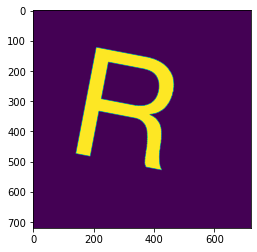

In [143]:
plt.imshow(R_rotate[0])

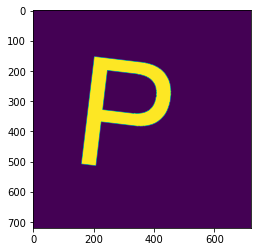

In [144]:
plt.imshow(P_rotate[0])

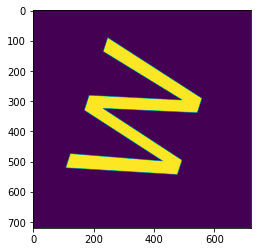

In [145]:
plt.imshow(W_rotate[0])